In [816]:
import numpy as np
np.random.seed(1)
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [817]:
class HNN():
    
    def __init__(self, df, threshold=0.0, noise_ratio=0.4):
        '''
        df_train : listの中に想起させたいnumpyのarray
        '''
        self.df = df
        self.image_num = len(self.df)
        self.dim = len(df[0].T)
        self.weight = np.zeros((self.dim, self.dim))
        self.threshold = threshold
        self.noise_ratio = noise_ratio
    
    def train(self):
        for image in self.df:
            self.weight += np.outer(image.T, image)
        self.weight /= self.image_num
        for i in range(self.dim):
            self.weight[i][i] = 0.0
        return None
    
    def energy_func(self, x):
        self.energy = - x.dot(self.weight).dot(x) / 2 + np.sum(self.threshold * x)
        return self.energy
    
    def predict(self, x, loop=10):
        x_copy = x.copy()
        e = self.energy_func(x_copy)
        for i in range(loop):
            np.array([[0, 1, 2, 3, 4],
                     ])
            np.random.shuffle(x_copy)
        # for i in range(loop):
        #    x_copy = self.weight.dot(x_copy) - self.threshold
        #    x_copy = np.sign(x_copy)
            # e_new = self.energy_func(x)
            # if e == e_new:
                # break
            # e = e_new
        return x_copy
    
def noise_injection(x, noise_ratio):
    x_copy = x.copy()
    change_or_not = np.random.binomial(n=1, p=noise_ratio, size=len(x))
    for i, v in enumerate(change_or_not):
        if v == 1:
            x_copy[i] *= -1
    return x_copy

In [933]:
train_array_1 = np.array([[1, -1, 1, 1, 1],
                         [-1, 1, -1, -1, -1],
                         [1, 1, -1, -1, 1],
                         [-1, -1, -1, -1, 1],
                         [1, -1, 1, -1, -1]]).reshape(25)
train_array_2 = np.array([[-1, 1, -1, -1, -1],
                         [1, -1, 1, 1, 1],
                         [-1, -1, 1, 1, -1],
                         [1, 1, 1, 1, -1],
                         [-1, 1, -1, 1, 1]]).reshape(25)
train_array_3 = np.array([[-1, 1, 1, 1, 1],
                         [-1, 1, 1, 1, 1],
                         [-1, 1, 1, 1, 1],
                         [-1, 1, 1, 1, 1],
                         [-1, 1, 1, 1, 1]]).reshape(25)
train_array_4 = np.array([[1, -1, 1, 1, -1],
                         [1, 1, -1, 1, -1],
                         [1, 1, 1, -1, -1],
                         [-1, 1, 1, -1, -1],
                         [1, -1, -1, -1, 1]]).reshape(25)
train_array_5 = np.array([[1, -1, -1, 1, -1],
                         [-1, 1, -1, -1, -1],
                         [1, -1, -1, -1, -1],
                         [-1, -1, -1, -1, -1],
                         [1, -1, -1, -1, -1]]).reshape(25)
train_array_6 = np.array([[1, 1, 1, 1, 1],
                         [1, 1, 1, -1, -1],
                         [1, 1, 1, 1, 1],
                         [-1, 1, 1, -1, 1],
                         [1, -1, 1, 1, -1]]).reshape(25)

In [946]:
error_rate = np.zeros((10))
for i in range(10):
    

    traindata = []
    # 画像データを3x3とする.
    traindata.append(train_array_1)
    traindata.append(train_array_2)
    # traindata.append(train_array_3)
    # traindata.append(train_array_4)
    # traindata.append(train_array_5)
    # traindata.append(train_array_6)

    hnn = HNN(traindata)
    hnn.train()
    noised_data = noise_injection(train_array_1, noise_ratio=0.7)
    predicted_data = hnn.predict(noised_data)

    # fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    # ax[0].imshow(train_array_1.reshape((5, 5)), 'gray')
    # ax[1].imshow(noised_data.reshape((5, 5)), 'gray')
    # ax[2].imshow(predicted_data.reshape((5, 5)), 'gray')
    # plt.savefig('1_10p.png')
    
    print(100 - np.abs(train_array_1 - predicted_data).sum() / 50 * 100)
    error_rate[i] += 100 - np.abs(train_array_1 - predicted_data).sum() / 50 * 100

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [945]:
np.mean(error_rate)

10.0

In [947]:
y1 = [100, 100, 100, 90, 50, 10, 0, 0, 0, 0]
y2 = [100, 100, 100, 90, 50, 10, 0, 0, 0, 0]
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

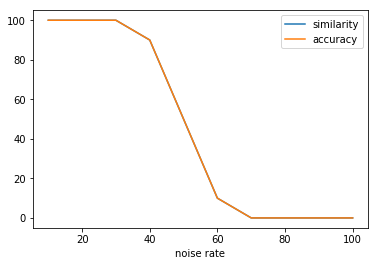

In [948]:
plt.plot(x, y1, label="similarity")
plt.plot(x, y2, label="accuracy")
plt.xlabel('noise rate')
plt.legend()
plt.savefig('2imges_by_vertical.png')